Using TensorFlow backend.


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 116s 4ms/step - loss: 1.7764 - accuracy: 0.5664 - val_loss: 0.4279 - val_accuracy: 0.8893
Epoch 2/15
31367/31367 [==============================] - 116s 4ms/step - loss: 0.5424 - accuracy: 0.8415 - val_loss: 0.1348 - val_accuracy: 0.9662
Epoch 3/15
31367/31367 [==============================] - 116s 4ms/step - loss: 0.3624 - accuracy: 0.8972 - val_loss: 0.1176 - val_accuracy: 0.9665
Epoch 4/15
31367/31367 [==============================] - 115s 4ms/step - loss: 0.2804 - accuracy: 0.9203 - val_loss: 0.0611 - val_accuracy: 0.9832
Epoch 5/15
31367/31367 [==============================] - 116s 4ms/step - loss: 0.2505 - accuracy: 0.9302 - val_loss: 0.0819 - val_accuracy: 0.9777
Epoch 6/15
31367/31367 [==============================] - 112s 4ms/step - loss: 0.2387 - accuracy: 0.9329 - val_loss: 0.0622 - va

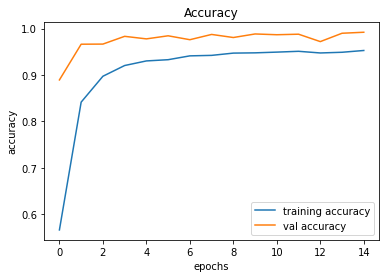

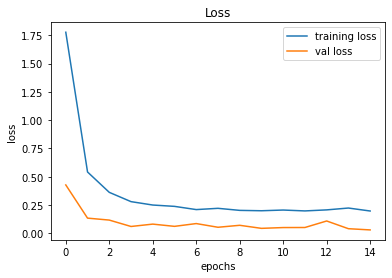

0.9639746634996041


In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os

# Data will store all the images of the training data set
# It will be a 4-d array where first dimension is the No. of images
# Next three dimension represents each image.
data = []

# Index will store the class to which the image belongs.
index = []

# There are 43 folders in the training data set
# Each folder has thousands of images of a particular signal.
classes = 43 

# cur_path has the path of current working directory 
cur_path = os.getcwd() 

# Retrieving the images and their labels 
for i in range(classes):
    
    path = os.path.join(cur_path,'train',str(i))
    
    # images has the list of all the images in the i th folder. 
    images = os.listdir(path)

    # Each image in the i th folder is converted into array & stored in data[]
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            index.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
index = np.array(index)

print(data.shape, index.shape)

# Splitting training and testing dataset
# 20% of the images in data will be used for testing
# Remaining 80% will be used for training
X_train, X_test, y_train, y_test = train_test_split(data, index, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training of model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

# After training, saving the model
model.save("Trained_model.h5")

# Plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

index = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(index, pred))
